In [1]:
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
import operator
import math
import os
import sys
import warnings

In [2]:
def euclidianDistance(l1,l2):
    distance = 0
    length = min(len(l1),len(l2))
    for i in range(length):
        distance += pow((int(l1[i]) - int(l2[i])), 2)
    return math.sqrt(distance)

In [3]:
def getkVoisins(lfeatures, test, k) :
    ldistances = []
    for i in range(len(lfeatures)):
        dist = euclidianDistance(test[1], lfeatures[i][1])
        ldistances.append((lfeatures[i][0], lfeatures[i][1], dist))
    ldistances.sort(key=operator.itemgetter(2))
    lvoisins = []
    for i in range(k):
        lvoisins.append(ldistances[i])
    return lvoisins

In [4]:
def recherche(image_req,top, features1):
  top=20
  voisins = getkVoisins(features1, features1[image_req],top)
  #print(voisins)
  nom_images_proches = []
  nom_images_non_proches = []
  for k in range(top):
      nom_images_proches.append(voisins[k][0])
      #print("done")
  plt.figure(figsize=(5, 5))
  plt.imshow(imread(features1[image_req][0]), cmap='gray', interpolation='none')
  plt.title("Image requête")
  nom_image_requete=os.path.splitext(os.path.basename(features1[image_req][0]))[0]
  print(nom_image_requete)
  plt.figure(figsize=(25, 25))
  plt.subplots_adjust(hspace=0.2, wspace=0.2)

  for j in range(top):
      plt.subplot(int(top/4),int(top/5),j+1)
      plt.imshow(imread(nom_images_proches[j]), cmap='gray', interpolation='none')
      nom_images_non_proches.append(os.path.splitext(os.path.basename(nom_images_proches[j]))[0])
      title = "Image proche n°"+str(j)
      plt.title(title)
  return nom_image_requete, nom_images_proches, nom_images_non_proches


116
Image requête :  116
Images proches :  ['image.orig/116.jpg', 'image.orig/118.jpg', 'image.orig/183.jpg', 'image.orig/182.jpg', 'image.orig/166.jpg', 'image.orig/210.jpg', 'image.orig/157.jpg', 'image.orig/119.jpg', 'image.orig/128.jpg', 'image.orig/875.jpg', 'image.orig/225.jpg', 'image.orig/170.jpg', 'image.orig/188.jpg', 'image.orig/139.jpg', 'image.orig/159.jpg', 'image.orig/146.jpg', 'image.orig/867.jpg', 'image.orig/126.jpg', 'image.orig/808.jpg', 'image.orig/192.jpg']
Images non proches :  ['116', '118', '183', '182', '166', '210', '157', '119', '128', '875', '225', '170', '188', '139', '159', '146', '867', '126', '808', '192']
done


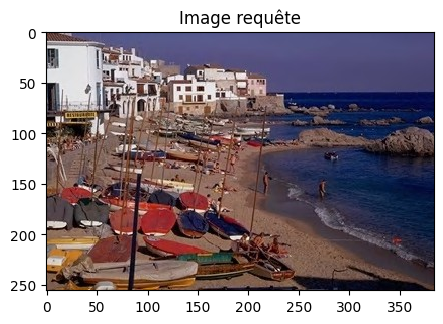

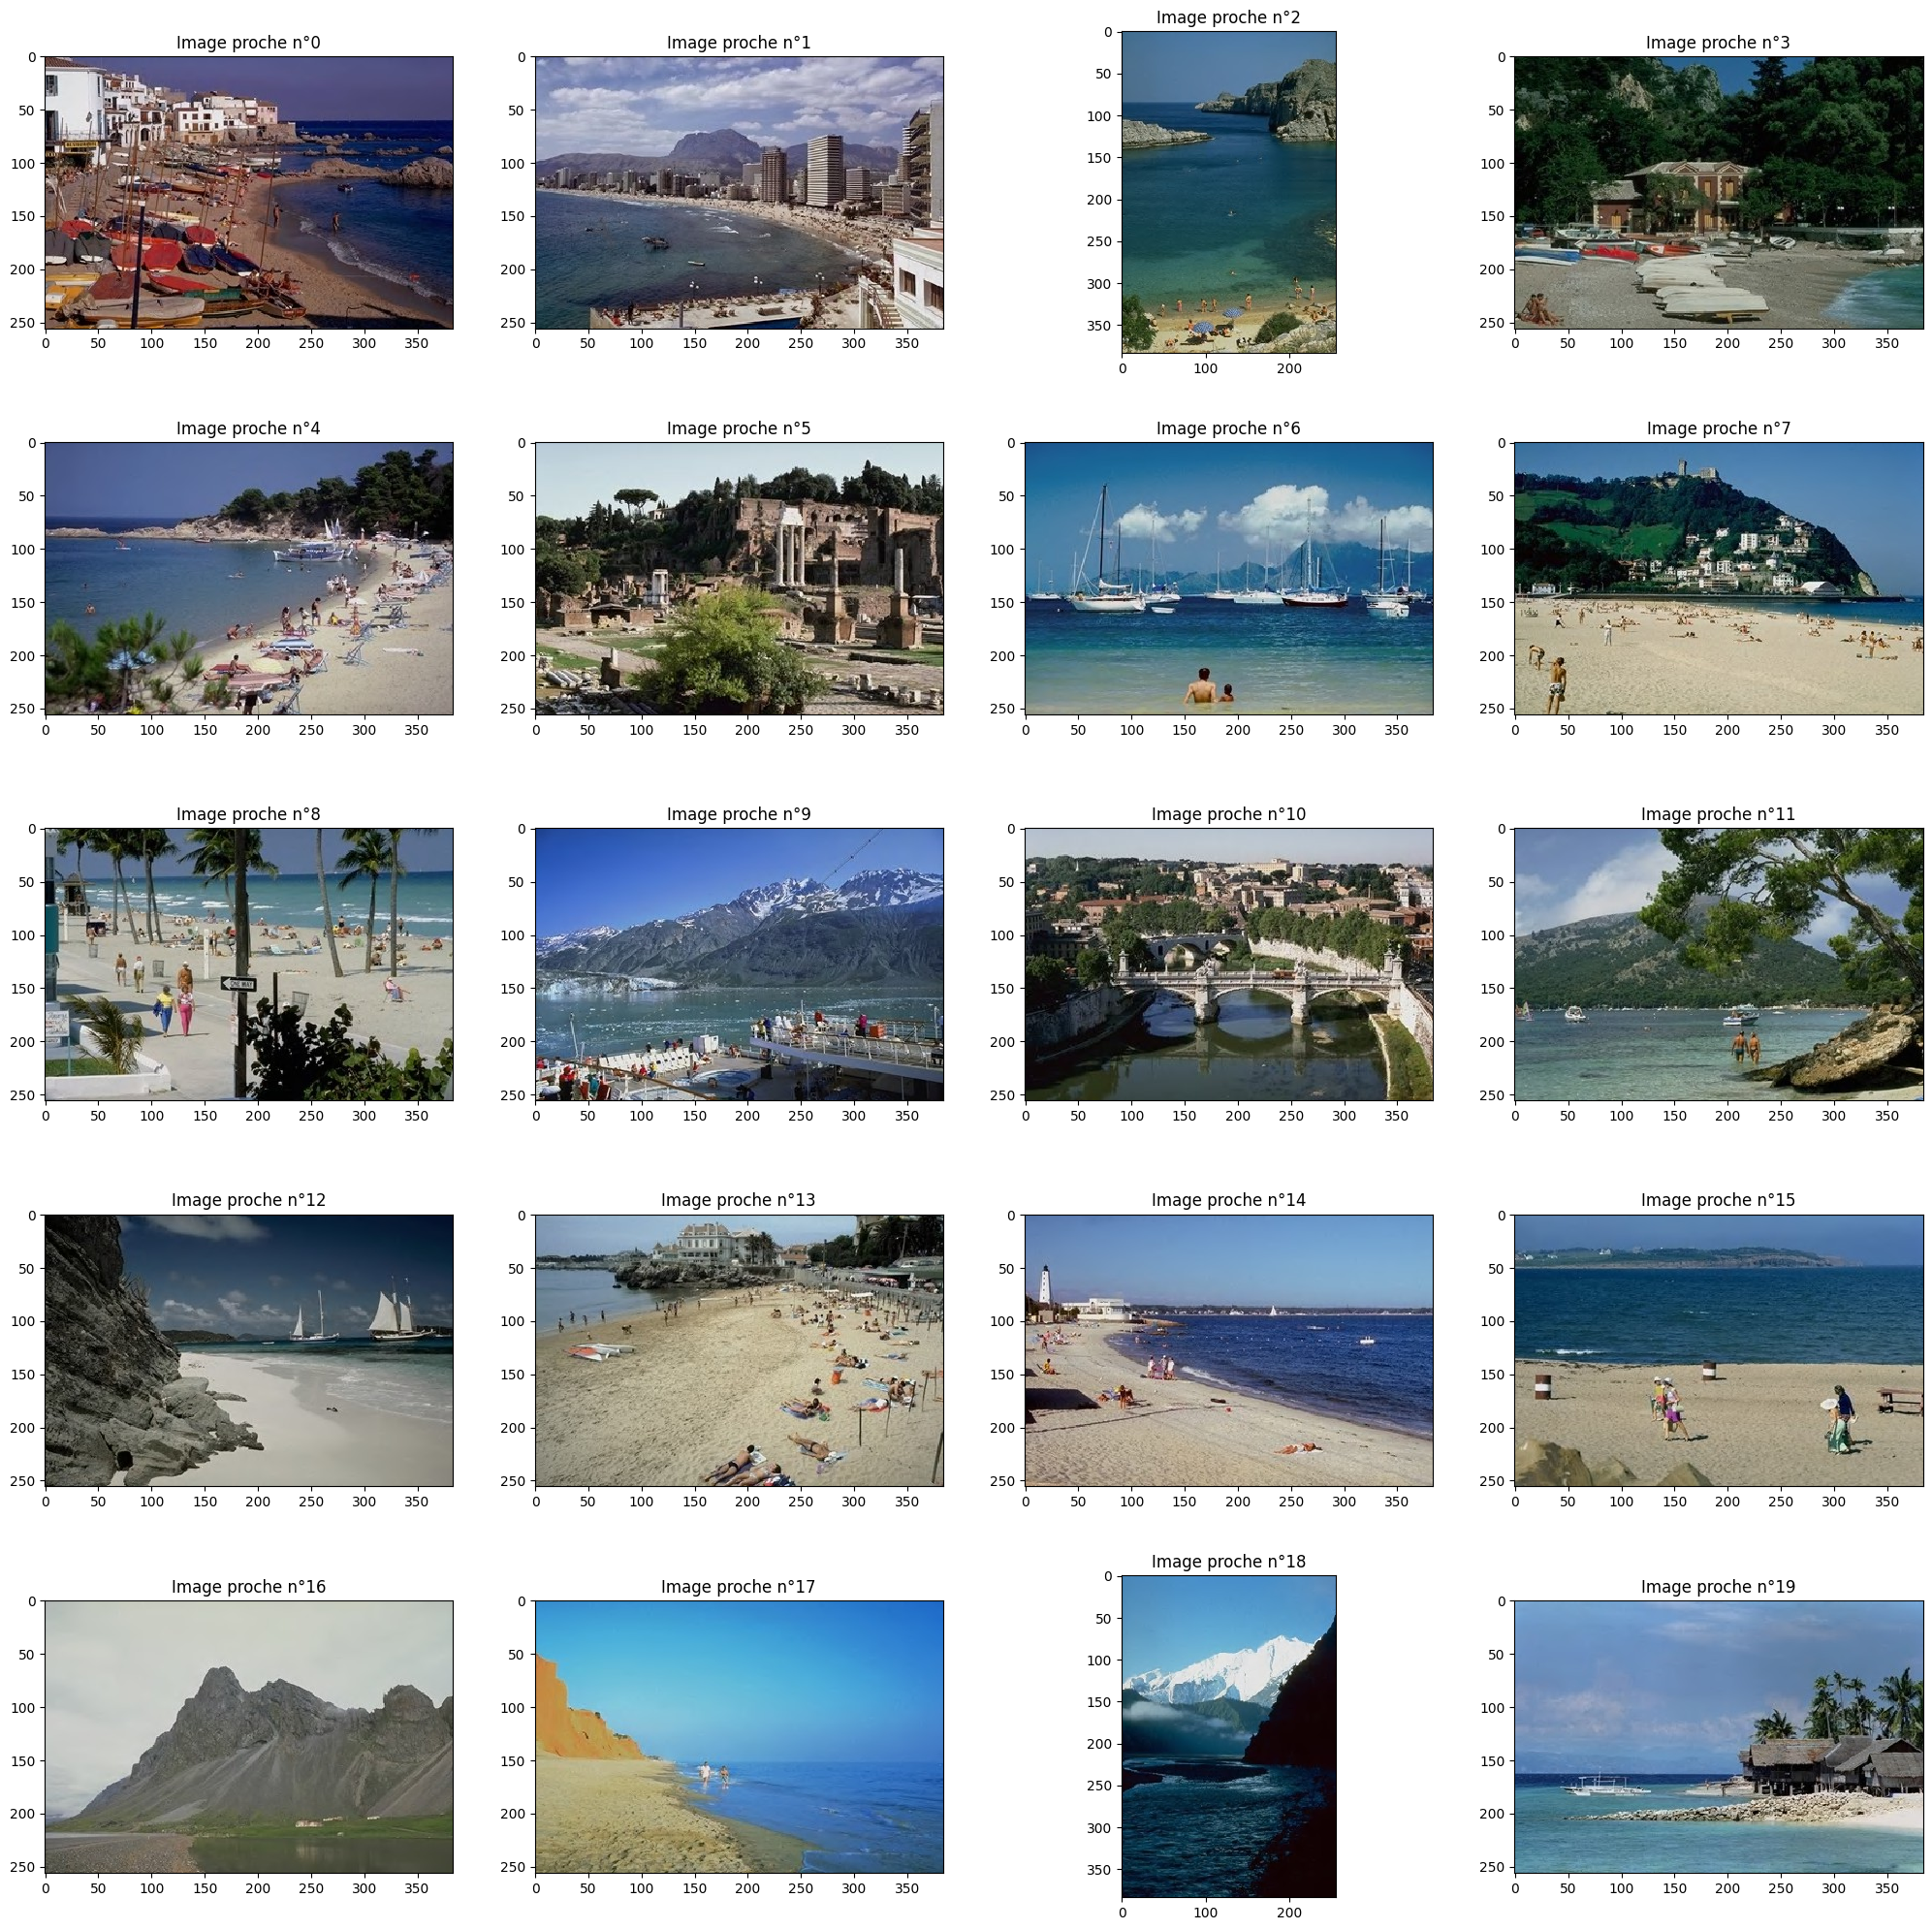

In [5]:
warnings.filterwarnings('ignore')
files = "image.orig"         #Chemin vers la base d'images
big_folder="Features_train/" #Dossier pour stocker les caractéristiques
if not os.path.exists(big_folder):
    os.makedirs(big_folder)
folder_model1="Features_train/VGG16/"
if not os.path.exists(folder_model1):
    os.makedirs(folder_model1)
    
features1 = []
try:
    for i in range(1000):
        with open(folder_model1+str(i)+".txt", 'r') as f:
            name = f"image.orig/{i}.jpg"
            data = [float(line) for line in f.read().strip().split('\n')]
            features1.append((name, data))

except Exception as e:
    print(f"Error reading file: {e}")

if len(sys.argv) > 1:
    nom_image_requete, nom_images_proches, nom_images_non_proches = recherche(116, 20, features1)

print("Image requête : ",nom_image_requete)
print("Images proches : ",nom_images_proches)
print("Images non proches : ",nom_images_non_proches)
print("done")